# EDA

This EDA is not 100% completed, here are some of the generic and first ideas graphics to see the overall of the dataset.

The complete anlysis has been done directly on the Streamlit app, where you can see the results of the analysis.

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap


In [105]:
# Load the data
df = pd.read_csv('../data/social_media_dataset.csv')

In [106]:
df.head()

,Platform,Hashtag,Content_Type,Impressions,Views,Likes,Shares,Comments,Engagement_Rate
0,TikTok,Music,Video,153973,75655,8760,2385,4208,0.2029
1,TikTok,Beauty,Video,178116,27357,21324,9454,6875,1.3764
2,TikTok,Education,Video,178751,87922,5802,4407,2529,0.1449
3,Twitter,Fitness,Carrousel,166543,88181,16065,4660,649,0.2424
4,Twitter,Gaming,Text,107985,61481,15830,4996,8138,0.4711


## Palette

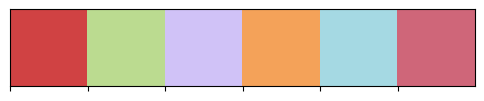

In [107]:
palette = ['#d04243', '#BBDB90', '#d0c2f7', '#f4a259', '#A5D9E3', '#CF6679']
sns.palplot(sns.color_palette(palette))

my_colors = ListedColormap(sns.color_palette(palette))

## Categorical Analysis

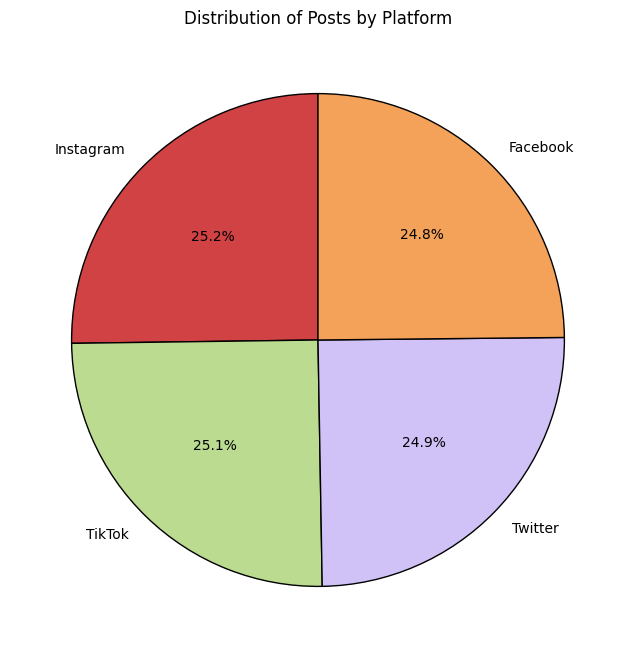

In [108]:
# Pie chart of Platforms
platform_counts = df['Platform'].value_counts()

plt.figure(figsize=(8, 8))
platform_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=palette,
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Distribution of Posts by Platform')
plt.ylabel('')  # Remove y-axis label for better appearance
plt.show()

/var/folders/jv/m28dc0910xgbzzt8gj8r_vlm0000gp/T/ipykernel_17141/616663453.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/var/folders/jv/m28dc0910xgbzzt8gj8r_vlm0000gp/T/ipykernel_17141/616663453.py:3: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


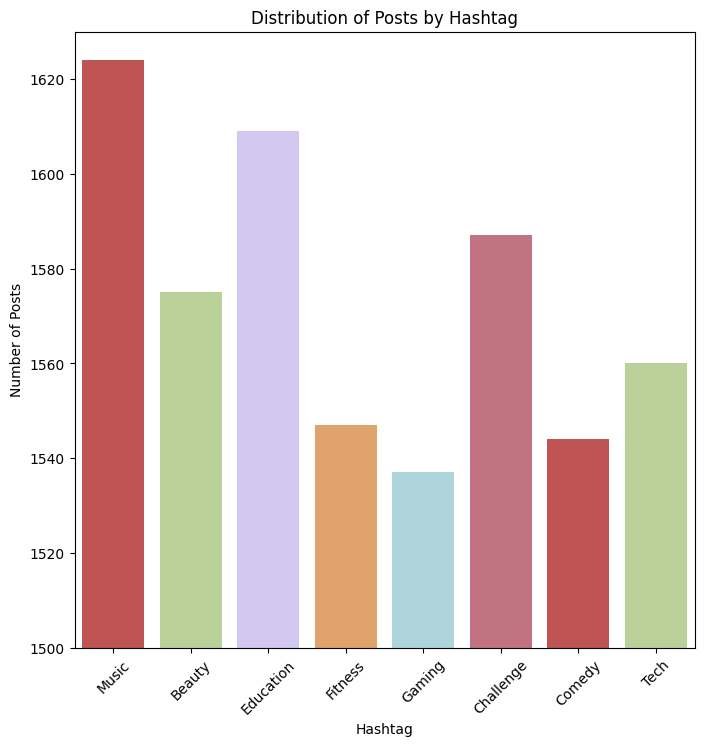

In [118]:
plt.figure(figsize=(8, 8))

sns.countplot(
    data=df,
    x='Hashtag',
    palette=palette
)

plt.xticks(rotation=45)
plt.title('Distribution of Posts by Hashtag')
plt.xlabel('Hashtag')
plt.ylabel('Number of Posts')
plt.ylim(1500, 1630)

plt.show()


/var/folders/jv/m28dc0910xgbzzt8gj8r_vlm0000gp/T/ipykernel_17141/1188393516.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/var/folders/jv/m28dc0910xgbzzt8gj8r_vlm0000gp/T/ipykernel_17141/1188393516.py:3: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.countplot(


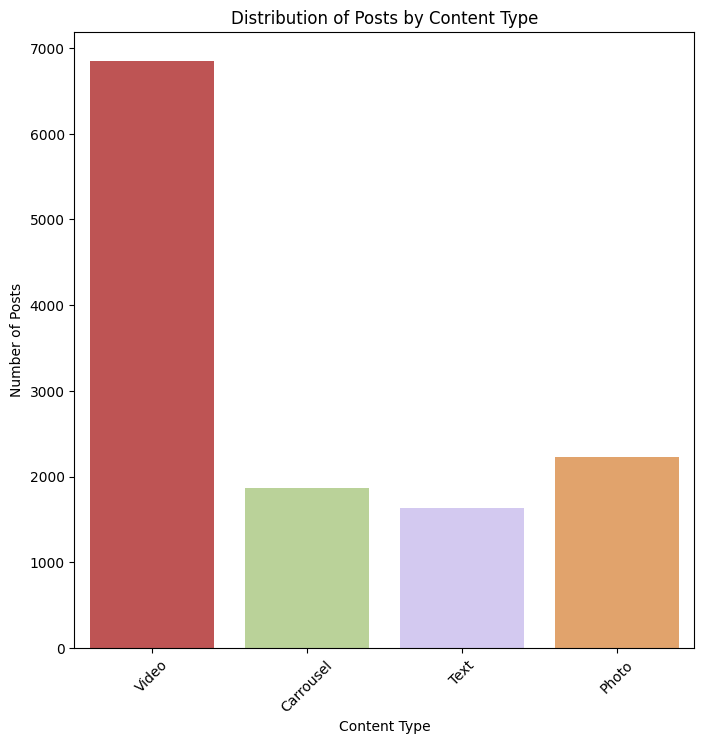

In [110]:
plt.figure(figsize=(8, 8))

sns.countplot(
    data=df,
    x='Content_Type',
    palette=palette
)

plt.xticks(rotation=45)
plt.title('Distribution of Posts by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Number of Posts')
#plt.ylim(750, 860)

plt.show()

/var/folders/jv/m28dc0910xgbzzt8gj8r_vlm0000gp/T/ipykernel_17141/511375998.py:3: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.countplot(


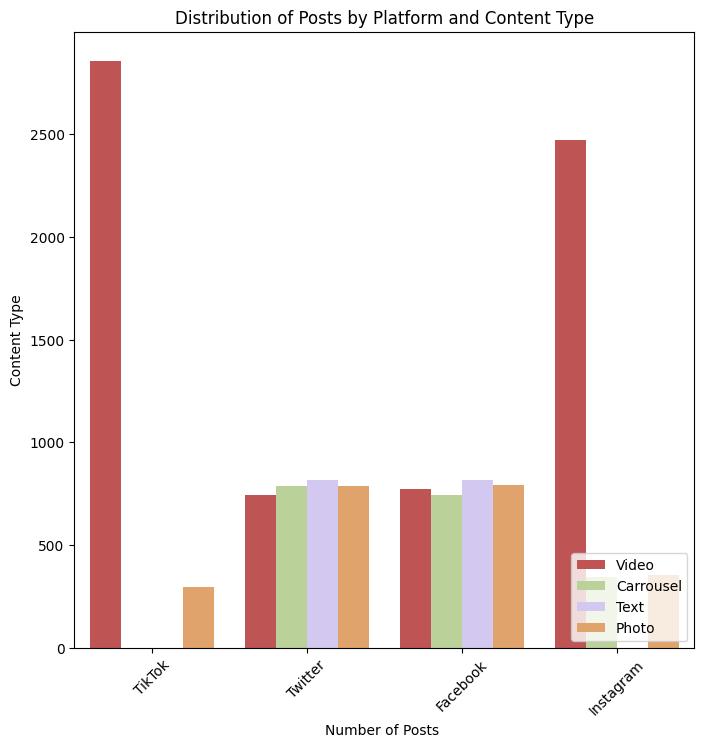

In [111]:
plt.figure(figsize=(8, 8))

sns.countplot(
    data=df,
    x='Platform',
    hue='Content_Type',
    palette=palette
)

plt.xticks(rotation=45)
plt.title('Distribution of Posts by Platform and Content Type')
plt.xlabel('Number of Posts ')
plt.ylabel('Content Type')

plt.legend(loc='lower right')  # Place the legend on the bottom right
plt.show()

In [112]:
platform_averages = df.groupby('Platform')[['Likes', 'Comments', 'Shares', 'Views', 'Impressions']].mean()

print(platform_averages)

                  Likes     Comments       Shares         Views    Impressions
Platform                                                                      
Facebook   10628.465280  3379.408000  3917.001920  76710.459200  127968.585600
Instagram  10585.659943  3422.103057  3812.933501  77499.901986  128379.612039
TikTok     10743.132572  3407.314621  3983.923248  77210.516968  128672.397082
Twitter    10574.540549  3365.954342  3844.161239  77260.569604  128071.053321


In [113]:
platform_averages['Engagement_Rate'] = (platform_averages['Likes'] + platform_averages['Comments'] + platform_averages['Shares']) / platform_averages['Views']
print(platform_averages)

                  Likes     Comments       Shares         Views  \
Platform                                                          
Facebook   10628.465280  3379.408000  3917.001920  76710.459200   
Instagram  10585.659943  3422.103057  3812.933501  77499.901986   
TikTok     10743.132572  3407.314621  3983.923248  77210.516968   
Twitter    10574.540549  3365.954342  3844.161239  77260.569604   

             Impressions  Engagement_Rate  
Platform                                   
Facebook   127968.585600         0.233669  
Instagram  128379.612039         0.229945  
TikTok     128672.397082         0.234869  
Twitter    128071.053321         0.230191  


# Content Analysis per Platform

## TikTok

In [114]:
# Dataframe with only the TikTok Data

tiktok_df = df[df['Platform'] == 'TikTok']

In [115]:
tiktok_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3153 entries, 0 to 12578
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platform         3153 non-null   object 
 1   Hashtag          3153 non-null   object 
 2   Content_Type     3153 non-null   object 
 3   Impressions      3153 non-null   int64  
 4   Views            3153 non-null   int64  
 5   Likes            3153 non-null   int64  
 6   Shares           3153 non-null   int64  
 7   Comments         3153 non-null   int64  
 8   Engagement_Rate  3153 non-null   float64
dtypes: float64(1), int64(5), object(3)
memory usage: 246.3+ KB


/var/folders/jv/m28dc0910xgbzzt8gj8r_vlm0000gp/T/ipykernel_17141/3012632095.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/var/folders/jv/m28dc0910xgbzzt8gj8r_vlm0000gp/T/ipykernel_17141/3012632095.py:3: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


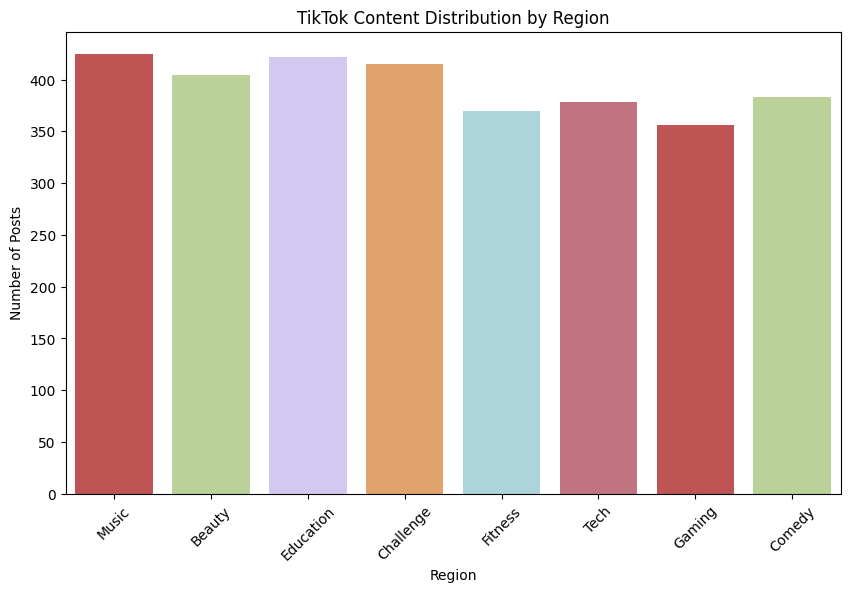

In [116]:
plt.figure(figsize=(10, 6))

sns.countplot(
    data=tiktok_df,
    x='Hashtag',
    palette=palette
)

plt.xticks(rotation=45)
plt.title('TikTok Content Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Posts')

plt.show()